In [2]:
import pandas as pd
import ast
import numpy as np

In [3]:
syllable = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/MOUS_IPA_SyllableFrequencies_ijfix2.csv')
zipf = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/merged-IPA_CELEX.csv')
bigram = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/mous_words_syllable_bigram_frequencies.csv')

In [4]:
bigram = bigram[['Word', 'Bigram Occurrence Counts']]
bigram['Bigram Occurrence Counts'] = bigram['Bigram Occurrence Counts'].apply(lambda s: ast.literal_eval(s.replace(",,", ",")))
bigram['Min_Bigram_Freq_Count'] = bigram['Bigram Occurrence Counts'].apply(lambda x: min(x) if x else None)
bigram['Max_Bigram_Freq_Count'] = bigram['Bigram Occurrence Counts'].apply(lambda x: max(x) if x else None)
bigram['Lg10_Max_Bigram_Freq_Count'] = bigram['Max_Bigram_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
bigram['Mean_Bigram_Freq_Count'] = bigram['Bigram Occurrence Counts'].apply(lambda x: np.mean(x) if x else None)
bigram['Lg10_Mean_Bigram_Freq_Count'] = bigram['Mean_Bigram_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
bigram['Lg10_Min_Bigram_Freq_Count'] = bigram['Min_Bigram_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
bigram

,Word,Bigram Occurrence Counts,Min_Bigram_Freq_Count,Max_Bigram_Freq_Count,Lg10_Max_Bigram_Freq_Count,Mean_Bigram_Freq_Count,Lg10_Mean_Bigram_Freq_Count,Lg10_Min_Bigram_Freq_Count
0,toen,"[2236591.0, 837795.0, 8542439.0]",837795.0,8542439.0,6.931582,3.872275e+06,6.587966,5.923138
1,de,[2559661.0],2559661.0,2559661.0,6.408182,2.559661e+06,6.408182,6.408182
2,barkeeper,"[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",189025.0,6799370.0,6.832469,2.081522e+06,6.318381,5.276519
3,die,"[1050254.0, 2076673.0]",1050254.0,2076673.0,6.317368,1.563464e+06,6.194088,6.021294
4,irritante,"[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",200692.0,4143386.0,6.617355,1.905164e+06,6.279932,5.302530
...,...,...,...,...,...,...,...,...
1937,blije,"[152155.0, 3369152.0, 1639122.0, 913788.0]",152155.0,3369152.0,6.527521,1.518554e+06,6.181430,5.182286
1938,jongeren,"[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",866375.0,8542439.0,6.931582,3.841034e+06,6.584448,5.937706
1939,intens,"[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",612425.0,8542439.0,6.931582,3.283876e+06,6.516387,5.787053
1940,plezier,"[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",97171.0,6799370.0,6.832469,2.265934e+06,6.355247,4.987537


In [5]:
syllable = syllable[['Word', 'Min_Freq_Count', 'Max_Freq_Count', 'Mean_Freq_Count']]
#rename Min_Freq_Count, Max_Freq_Count, Mean_Freq_Count to Min_Syllable_Freq_Count, Max_Syllable_Freq_Count, Mean_Syllable_Freq_Count
syllable = syllable.rename(columns={'Min_Freq_Count': 'Min_Syllable_Freq_Count', 'Max_Freq_Count': 'Max_Syllable_Freq_Count', 'Mean_Freq_Count': 'Mean_Syllable_Freq_Count'})
syllable['Lg10 Min_Syllable_Freq_Count'] = syllable['Min_Syllable_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
syllable['Lg10 Max_Syllable_Freq_Count'] = syllable['Max_Syllable_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
syllable['Lg10 Mean_Syllable_Freq_Count'] = syllable['Mean_Syllable_Freq_Count'].apply(lambda x: np.log10(x) if x else None)

syllable

,Word,Min_Syllable_Freq_Count,Max_Syllable_Freq_Count,Mean_Syllable_Freq_Count,Lg10 Min_Syllable_Freq_Count,Lg10 Max_Syllable_Freq_Count,Lg10 Mean_Syllable_Freq_Count
0,torens,764,102068,51416.000000,2.883093,5.008890,4.711098
1,ervaren,6659,237688,110881.333333,3.823409,5.376007,5.044858
2,bespreking,14348,24908,20093.000000,4.156791,4.396339,4.303045
3,verder,13127,50286,31706.500000,4.118165,4.701447,4.501148
4,zonnen,1160,257062,129111.000000,3.064458,5.410038,5.110963
...,...,...,...,...,...,...,...
1905,ver,13127,13127,13127.000000,4.118165,4.118165,4.118165
1906,humeur,726,11259,5992.500000,2.860937,4.051500,3.777608
1907,pijn,14653,14653,14653.000000,4.165927,4.165927,4.165927
1908,sporthal,32,129004,64518.000000,1.505150,5.110603,4.809681


In [6]:
zipf = zipf[['Word', 'Zipf']]
zipf

,Word,Zipf
0,ik,7.597064
1,je,7.559864
2,het,7.384235
3,de,7.381291
4,dat,7.340221
...,...,...
47642,aanbidster,1.656532
47643,aanbesteden,1.656532
47644,aanbelanden,1.656532
47645,aanbaksel,1.656532


In [7]:
# Merge the dataframes
df = pd.merge(syllable, bigram, on='Word', how='inner')
df = pd.merge(df, zipf, on='Word', how='inner')

In [8]:
df = df.drop(columns=['Bigram Occurrence Counts'])
#sort df columns. Word, Min_Syllable_Freq_Count, Max_Syllable_Freq_Count, Mean_Syllable_Freq_Count, Lg10 Min_Syllable_Freq_Count, Lg10 Max_Syllable_Freq_Count, Lg10 Mean_Syllable_Freq_Count, Min_Bigram_Freq_Count, Max_Bigram_Freq_Count, Mean_Bigram_Freq_Count, Lg10_Min_Bigram_Freq_Count, Lg10_Max_Bigram_Freq_Count, Lg10_Mean_Bigram_Freq_Count, Zipf
df = df[['Word', 'Min_Syllable_Freq_Count', 'Max_Syllable_Freq_Count', 'Mean_Syllable_Freq_Count', 'Lg10 Min_Syllable_Freq_Count', 'Lg10 Max_Syllable_Freq_Count', 'Lg10 Mean_Syllable_Freq_Count', 'Min_Bigram_Freq_Count', 'Max_Bigram_Freq_Count', 'Mean_Bigram_Freq_Count', 'Lg10_Min_Bigram_Freq_Count', 'Lg10_Max_Bigram_Freq_Count', 'Lg10_Mean_Bigram_Freq_Count', 'Zipf']]
df

,Word,Min_Syllable_Freq_Count,Max_Syllable_Freq_Count,Mean_Syllable_Freq_Count,Lg10 Min_Syllable_Freq_Count,Lg10 Max_Syllable_Freq_Count,Lg10 Mean_Syllable_Freq_Count,Min_Bigram_Freq_Count,Max_Bigram_Freq_Count,Mean_Bigram_Freq_Count,Lg10_Min_Bigram_Freq_Count,Lg10_Max_Bigram_Freq_Count,Lg10_Mean_Bigram_Freq_Count,Zipf
0,ervaren,6659,237688,110881.333333,3.823409,5.376007,5.044858,59129.0,8542439.0,3.179470e+06,4.771801,6.931582,6.502355,4.106781
1,bespreking,14348,24908,20093.000000,4.156791,4.396339,4.303045,242781.0,2927082.0,1.540391e+06,5.385215,6.466435,6.187631,3.742892
2,verder,13127,50286,31706.500000,4.118165,4.701447,4.501148,823655.0,6799370.0,3.749966e+06,5.915745,6.832469,6.574027,5.506535
3,zonnen,1160,257062,129111.000000,3.064458,5.410038,5.110963,40239.0,8542439.0,2.651362e+06,4.604647,6.931582,6.423469,3.412407
4,stranden,297,7143,3720.000000,2.472756,3.853881,3.570543,1199332.0,8542439.0,3.364061e+06,6.078939,6.931582,6.526864,3.396895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,ver,13127,13127,13127.000000,4.118165,4.118165,4.118165,1767776.0,6799370.0,4.283573e+06,6.247427,6.832469,6.631806,5.115246
1170,humeur,726,11259,5992.500000,2.860937,4.051500,3.777608,135956.0,1659354.0,5.314850e+05,5.133398,6.219939,5.725491,3.689956
1171,pijn,14653,14653,14653.000000,4.165927,4.165927,4.165927,79695.0,1639122.0,1.095024e+06,4.901431,6.214611,6.039424,5.421455
1172,sporthal,32,129004,64518.000000,1.505150,5.110603,4.809681,446916.0,2597583.0,1.437987e+06,5.650226,6.414569,6.157755,2.585951


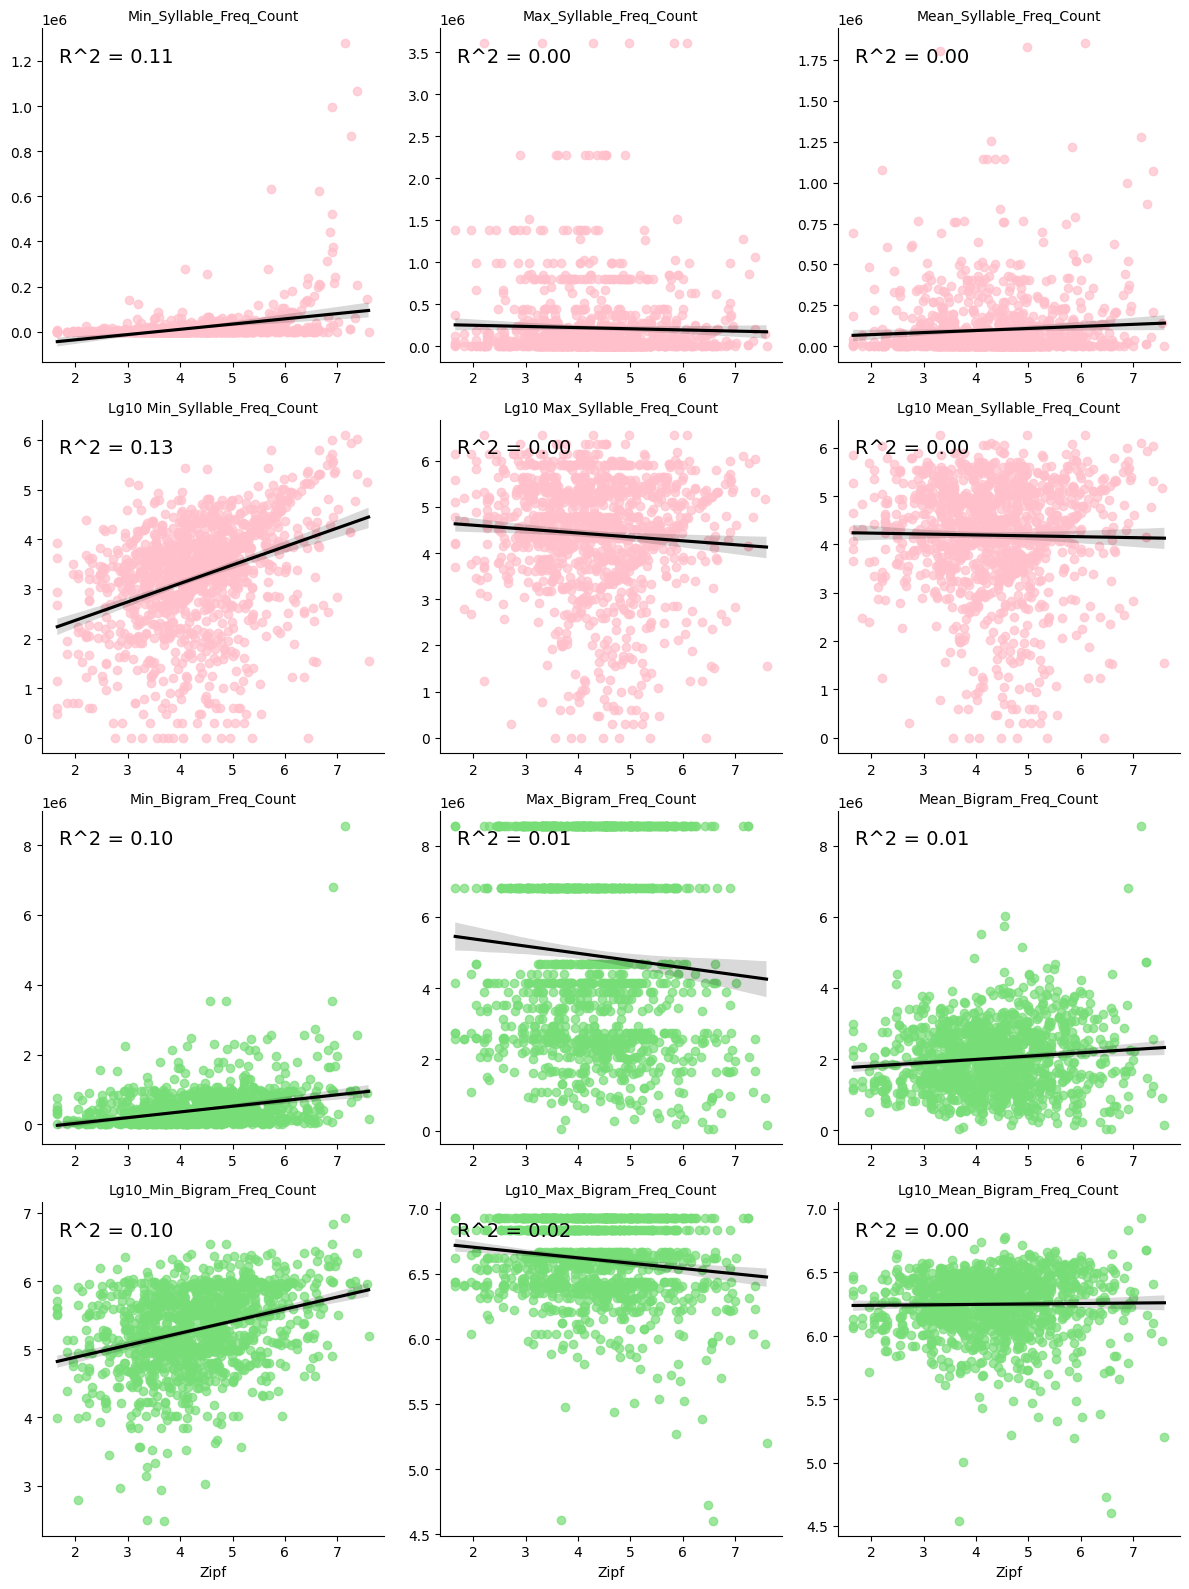

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Suppose df is your DataFrame, with columns including ['Zipf', 'Word', ...features...]
# We'll "melt" all other features into a long format
df_melt = df.melt(id_vars=['Zipf', 'Word'], var_name='feature', value_name='value')

# 1. Drop NaN or infinite values to avoid Pearson correlation errors
df_melt = df_melt.dropna(subset=['Zipf', 'value'])
df_melt = df_melt[np.isfinite(df_melt['Zipf']) & np.isfinite(df_melt['value'])]

# Define a function that will handle coloring by feature and plotting with regression
def custom_regplot_with_r2(data, **kwargs):
    # Identify which feature we're plotting
    feature = data['feature'].iloc[0]
    
    # 2. Pick scatter color based on feature name
    if 'Syl' in feature or 'Syllable' in feature:
        point_color = 'pink'
    elif 'BG' in feature or 'Bigram' in feature:
        point_color = '#77dd77'
    else:
        point_color = 'gray'  # or another default color
    
    # 3. Safely compute correlation if there's more than one data point
    if len(data) > 1:
        r, _ = stats.pearsonr(data['Zipf'], data['value'])
        r2 = r**2
    else:
        r2 = 0.0
    
    # 4. Plot scatter + regression line with separate colors
    sns.regplot(
        x='Zipf',
        y='value',
        data=data,
        scatter_kws={'color': point_color, 'alpha': 0.7},
        line_kws={'color': 'black'},  # Use black (or another color) for trendline
        **kwargs
    )

    # 5. Annotate R^2 in the upper-left corner of each subplot
    plt.text(
        0.05, 0.9, f'R^2 = {r2:.2f}',
        transform=plt.gca().transAxes,
        fontsize=14
    )

# 6. Create a FacetGrid (tile layout)
g = sns.FacetGrid(
    df_melt, 
    col='feature',
    col_wrap=3,  # number of subplots per row
    height=4,
    sharex=False,
    sharey=False
)

# 7. Map our custom plotting function to the FacetGrid
g.map_dataframe(custom_regplot_with_r2)

# 8. Set axis labels, titles, and tighten layout
g.set_axis_labels('Zipf', '')
g.set_titles(col_template='{col_name}')
plt.tight_layout()
plt.show()

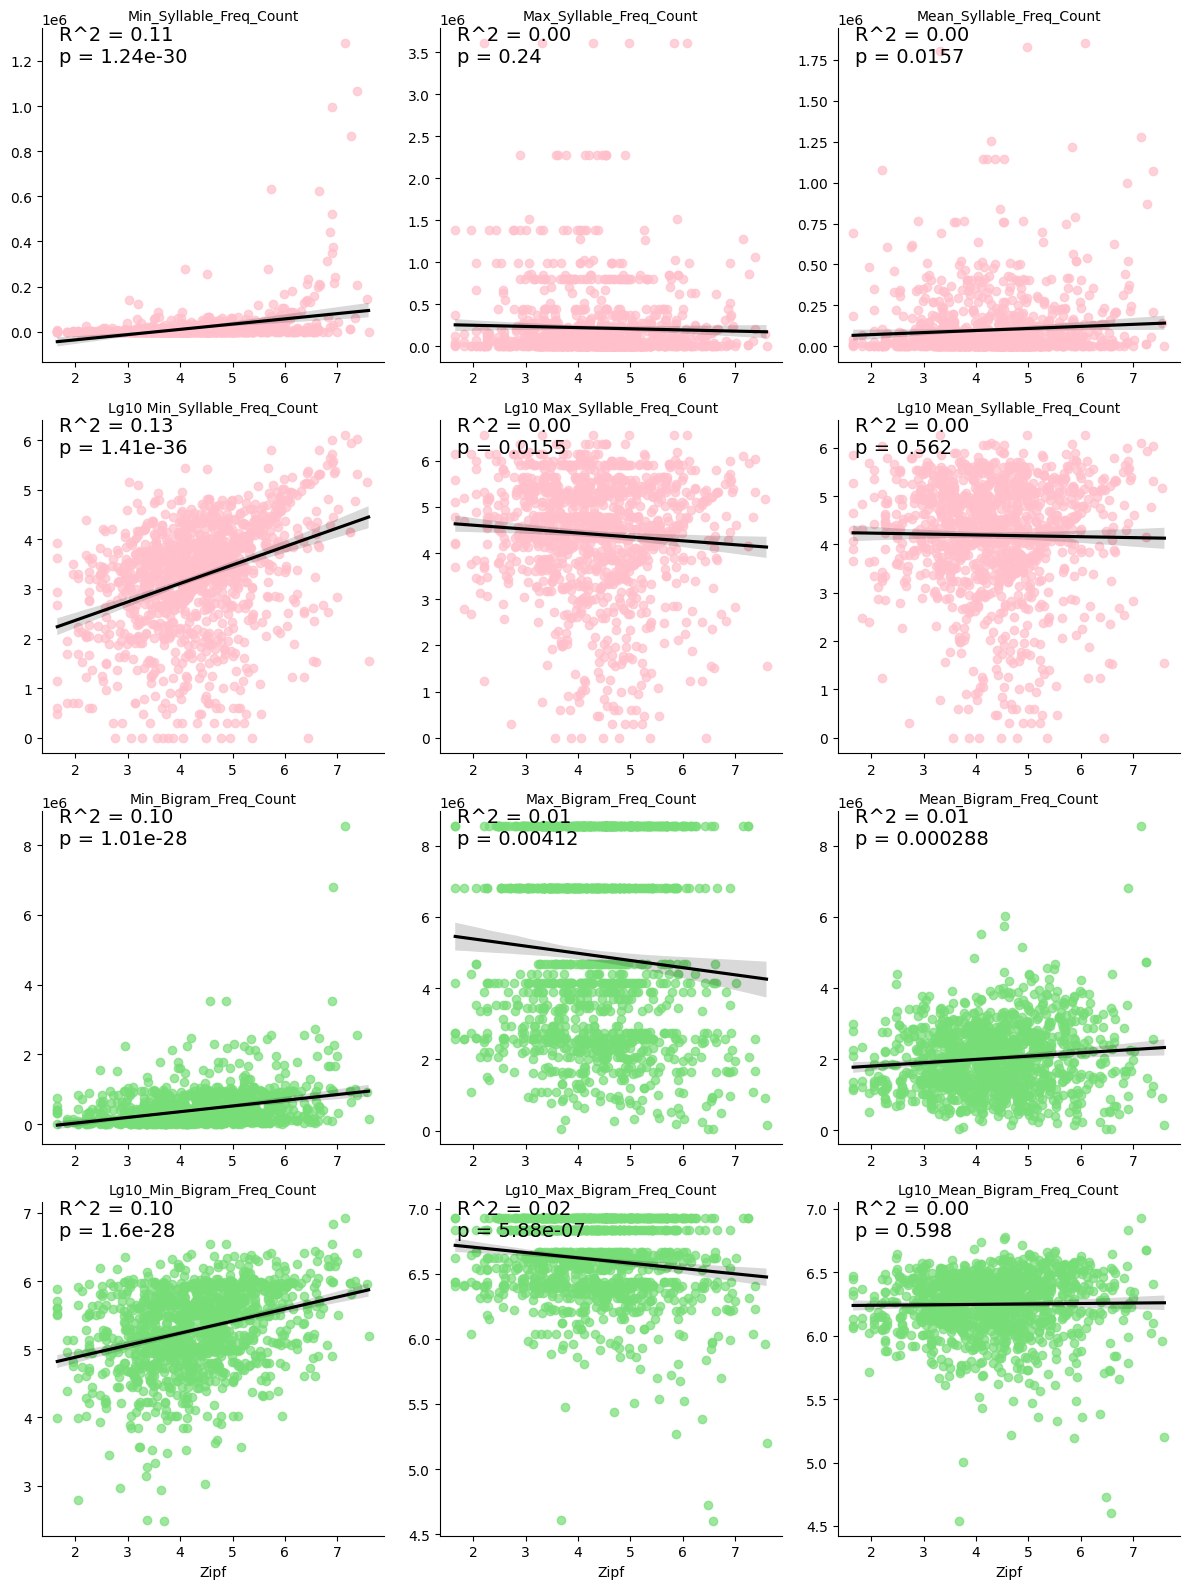

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Suppose df is your DataFrame, with columns including ['Zipf', 'Word', ...features...]
df_melt = df.melt(id_vars=['Zipf', 'Word'], var_name='feature', value_name='value')

# 1. Drop NaN or infinite values to avoid Pearson correlation errors
df_melt = df_melt.dropna(subset=['Zipf', 'value'])
df_melt = df_melt[np.isfinite(df_melt['Zipf']) & np.isfinite(df_melt['value'])]

def custom_regplot_with_r2(data, **kwargs):
    """
    1. Color points based on feature name.
    2. Compute correlation, p-value.
    3. Plot scatter + best-fit line in distinct colors.
    4. Annotate R^2 and p-value only.
    """
    feature = data['feature'].iloc[0]

    # Color scheme based on feature name
    if 'Syl' in feature or 'Syllable' in feature:
        point_color = 'pink'
    elif 'BG' in feature or 'Bigram' in feature:
        point_color = '#77dd77'  # a light green
    else:
        point_color = 'gray'

    # Compute correlation if there's more than one data point
    if len(data) > 1:
        r, p = stats.pearsonr(data['Zipf'], data['value'])
        r2 = r**2
    else:
        r2 = 0.0
        p = 1.0

    # Scatter + regression line
    sns.regplot(
        x='Zipf',
        y='value',
        data=data,
        scatter_kws={'color': point_color, 'alpha': 0.7},
        line_kws={'color': 'black'},  # distinct color for trendline
        **kwargs
    )

    # Annotate: "R^2 = 0.23\np = 0.00012"
    plt.text(
        0.05, 0.9,
        f'R^2 = {r2:.2f}\np = {p:.3g}',
        transform=plt.gca().transAxes,
        fontsize=14
    )

# Create a FacetGrid (tile layout)
g = sns.FacetGrid(
    df_melt, 
    col='feature',
    col_wrap=3,
    height=4,
    sharex=False,
    sharey=False
)

# Map our custom plotting function to the FacetGrid
g.map_dataframe(custom_regplot_with_r2)

# Set axis labels, titles, and finalize layout
g.set_axis_labels('Zipf', '')
g.set_titles(col_template='{col_name}')
plt.tight_layout()
plt.show()

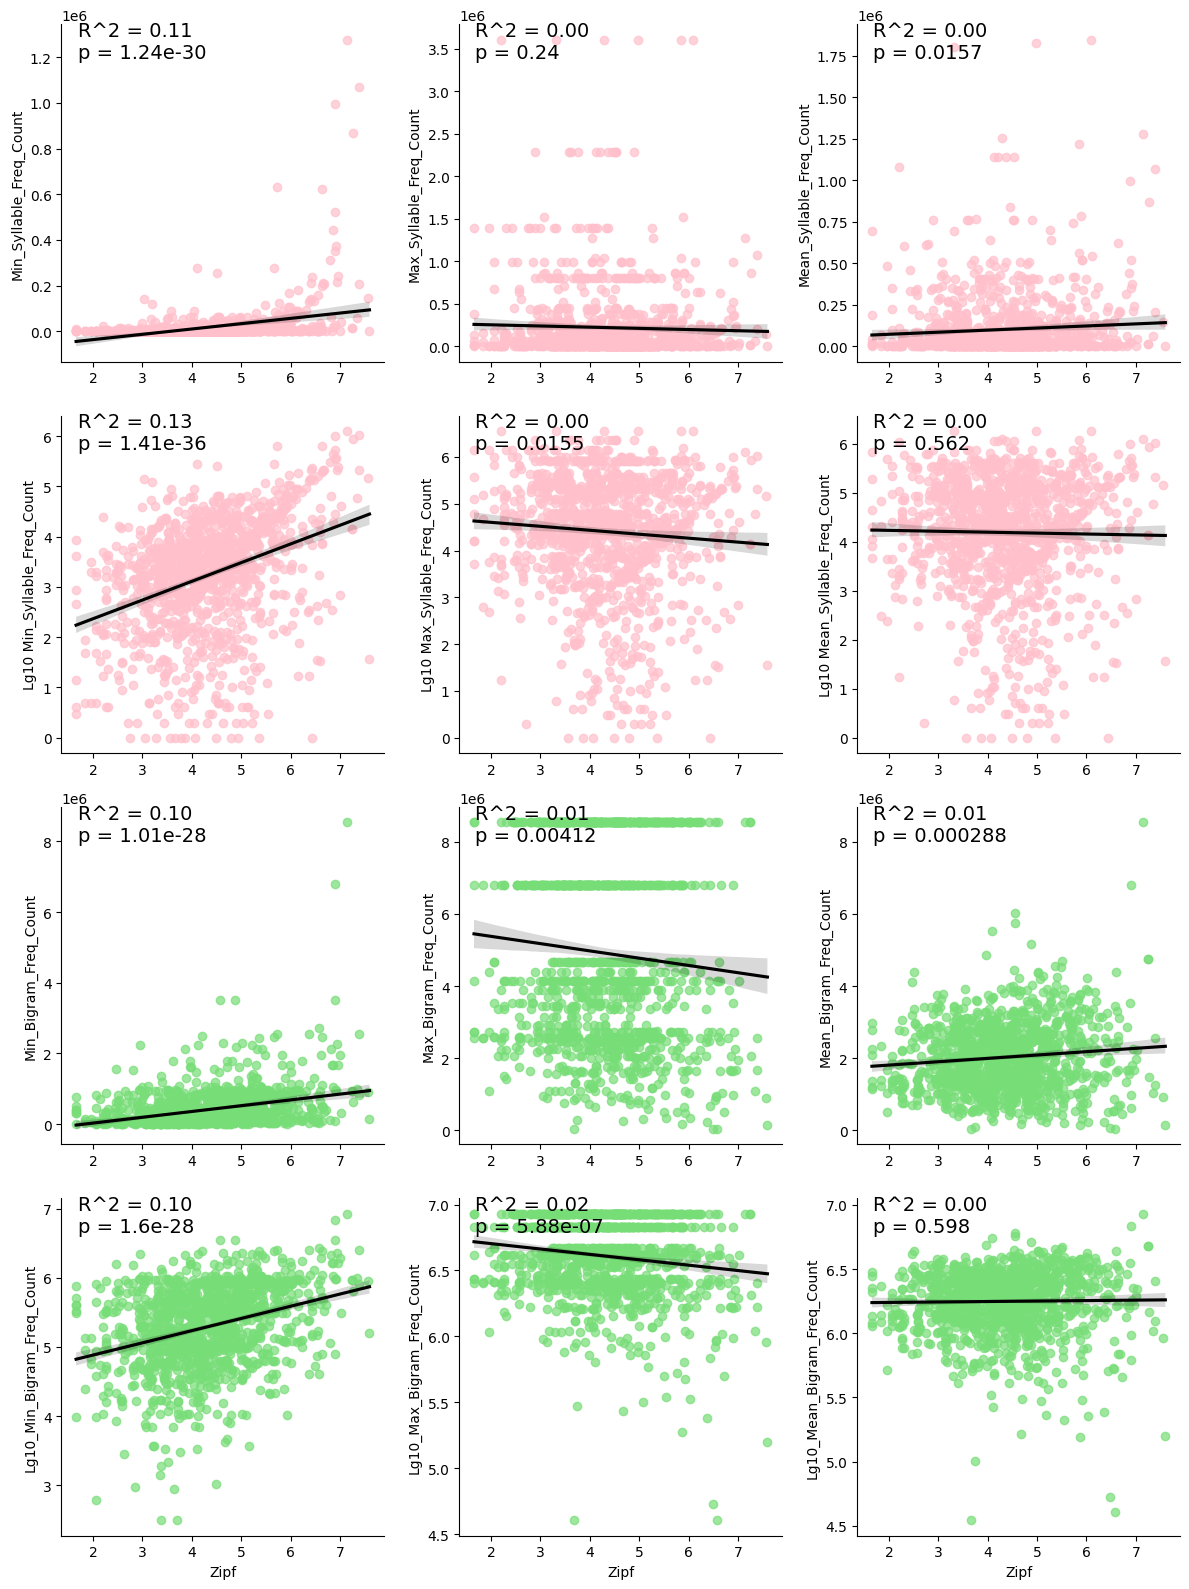

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Suppose df is your DataFrame, with columns including ['Zipf', 'Word', ...features...]
df_melt = df.melt(id_vars=['Zipf', 'Word'], var_name='feature', value_name='value')

# 1. Drop NaN or infinite values to avoid Pearson correlation errors
df_melt = df_melt.dropna(subset=['Zipf', 'value'])
df_melt = df_melt[np.isfinite(df_melt['Zipf']) & np.isfinite(df_melt['value'])]

def custom_regplot_with_r2(data, **kwargs):
    """
    1. Color points based on feature name.
    2. Compute correlation, p-value.
    3. Plot scatter + best-fit line in distinct colors.
    4. Annotate R^2 and p-value only.
    """
    feature = data['feature'].iloc[0]

    # Color scheme based on feature name
    if 'Syl' in feature or 'Syllable' in feature:
        point_color = 'pink'
    elif 'BG' in feature or 'Bigram' in feature:
        point_color = '#77dd77'  # a light green
    else:
        point_color = 'gray'

    # Compute correlation if there's more than one data point
    if len(data) > 1:
        r, p = stats.pearsonr(data['Zipf'], data['value'])
        r2 = r**2
    else:
        r2 = 0.0
        p = 1.0

    # Scatter + regression line
    sns.regplot(
        x='Zipf',
        y='value',
        data=data,
        scatter_kws={'color': point_color, 'alpha': 0.7},
        line_kws={'color': 'black'},  # distinct color for trendline
        **kwargs
    )

    # Annotate: "R^2 = 0.23\np = 0.00012"
    plt.text(
        0.05, 0.9,
        f'R^2 = {r2:.2f}\np = {p:.3g}',
        transform=plt.gca().transAxes,
        fontsize=14
    )

# Create a FacetGrid (tile layout)
g = sns.FacetGrid(
    df_melt, 
    col='feature',
    col_wrap=3,
    height=4,
    sharex=False,
    sharey=False
)

# Map our custom plotting function to the FacetGrid
g.map_dataframe(custom_regplot_with_r2)

# Set axis labels, titles, and finalize layout
g.set_axis_labels('Zipf', '')
g.set_titles(col_template='')

# Set y-axis labels as subplot titles
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_ylabel(title)

plt.tight_layout()
plt.show()